# World Bank Data Analysis - Research ICT Africa -

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import seaborn as sns
import re
mpl.rcParams['axes.unicode_minus'] = False
palette = sns.color_palette("pastel")
plt.rcParams["font.family"] = 'Nanum Gothic TTF'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)
path = 'NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [235]:
df_b = pd.read_csv('rias-2017-2018-business-v1.csv') #business
df_vb = pd.read_excel('RIA relevant variables.xlsx', sheet_name = 'Business') # business variables

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,26,30,31,32,33,34,35,37,44,48,65,66,70,87,96,97,103,107,108,123,129,162,165,177,178,250,251,252,253,254,255) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [237]:
# Delete Rows Without Serial Numbers
for x in range(len(df_b)):
    if re.match('\w\w\d\d\d',df_b['RIAserial'][x]) is None:
        df_b = df_b.drop(x)

In [4]:
# Questions Indicating Usage
# ['D27', 'D28', 'B10', 'MM1']

In [430]:
df_training = df_b['D27'].replace('0', 0, regex=True).replace('1', 1, regex=True).replace(' ', np.NaN)
df_stack = pd.DataFrame({"Yes":[df_training.mean()*100]})
df_stack['No'] = 100 - df_stack['Yes']

In [426]:
df_stack['Yes']=df_training.mean()*100

In [453]:
#yes no function
def plot_yn2(var_name):
    
    df_training = df_b[df_b[var_name]!='99']
    df_training = df_training[var_name].replace('0', 0, regex=True).replace('1', 1, regex=True).replace(' ', np.NaN)
    df_stack = pd.DataFrame()
    df_stack = pd.DataFrame({"Yes":[df_training.mean()*100]})
    df_stack['No'] = 100 - df_stack['Yes']
#     df_yn = pd.DataFrame(df_b[var_num].dropna())
    
    yn_sum = len(df_training.dropna())
#     df_yn = df_yn.replace('0', 0, regex = True)
#     df_yn = df_yn.replace('1', 1, regex = True)
#     df_yn[var_num]=df_yn[var_num].str.replace(' ','')
#     df_yn[var_num]=df_yn[var_num].str.replace('0.No','No')
#     df_yn[var_num]=df_yn[var_num].str.replace('0. No','No')
#     df_yn[var_num]=df_yn[var_num].str.replace('1.Yes','Yes')
#     df_yn[var_num]=df_yn[var_num].str.replace('1. Yes','Yes')
#     df_yn = pd.DataFrame(df_yn[var_num].value_counts()).sort_index(ascending=False)
#     df_yn = df_yn.div(df_yn.sum(axis=0), axis=1)
    ax = df_stack.plot(kind='bar', stacked = True, figsize = (10,10), colormap='Pastel1')
    ax.text(0.3, 0.8, f'obs:{yn_sum}')
    ax.axes.xaxis.set_visible(False)
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
#         ax.annotate("%.1f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center')
        if height<5:
            ax.annotate(str(round(height,1))+"%", (left+width/2, bottom+2.5), ha='center', va='center', fontsize = 20)
        else:
            ax.annotate(str(round(height,1))+"%", (left+width/2, bottom+height/2), ha='center', va='center', fontsize = 20)

#     plt.xlabel(f'{var_num}.{df_vb.loc[var_num]["question"]}', fontsize = 20)

In [484]:
df_b[(df_b['B1']=='0. No')&~(df_b['B10'].isnull())]['B10']

383      0. No
423     1. Yes
424      0. No
425      0. No
426      0. No
         ...  
3889     0. No
3891     0. No
3892     0. No
3893     0. No
3897     0. No
Name: B10, Length: 1626, dtype: object

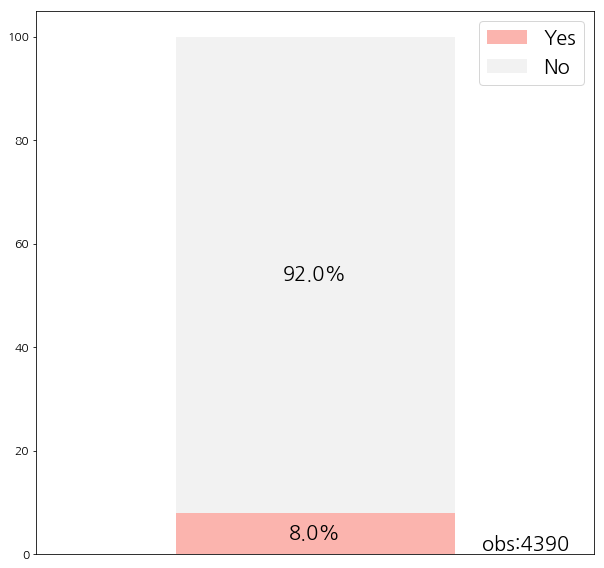

In [581]:
plot_yn2('I1')

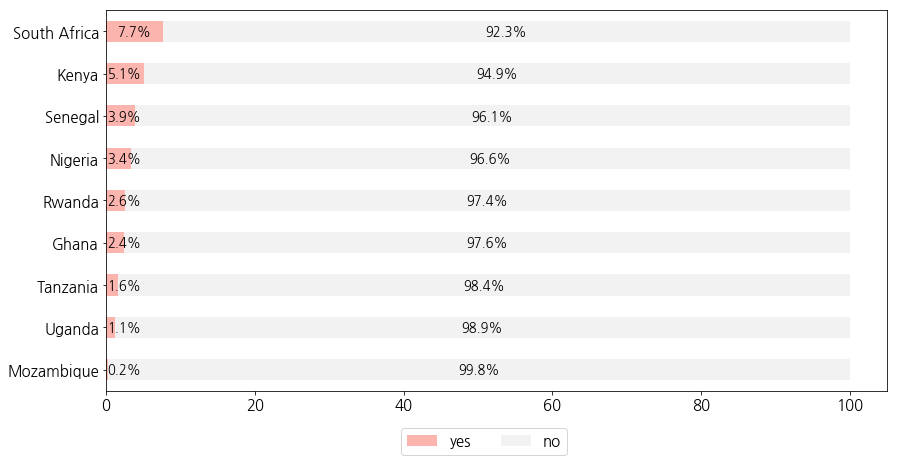

In [378]:
df_bd = df_b.dropna(subset = ['BS4']).replace('0. No', 0, regex=True).replace('1. Yes', 1, regex=True).replace(' ', np.NaN)
df_bd['A5']=df_bd['A5'].str.extract('([a-zA-Z]+\s?[a-zA-Z]+)')
df_by = df_bd[df_bd['BS4']==1]['A5'].value_counts()
df_bn = df_bd[df_bd['BS4']==0]['A5'].value_counts()
df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
df_p = df_p.div(df_p.sum(axis=0), axis =1)*100
df_p.index = ['yes', 'no']

ax = df_p.T.sort_values('yes', ascending=True).plot(kind='barh', stacked = True, colormap='Pastel1', figsize = (14,7), fontsize = 15)
plt.legend(bbox_to_anchor=(0.6,-0.7/9), ncol=2, prop={'size': 15})
for i, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    if i<9:
        if width<5:
            ax.annotate(str(round(width,1))+"%", (left+2.5, bottom+height*0.3), ha='center', fontsize = 13)
        else:
            ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
    else:
        ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
    

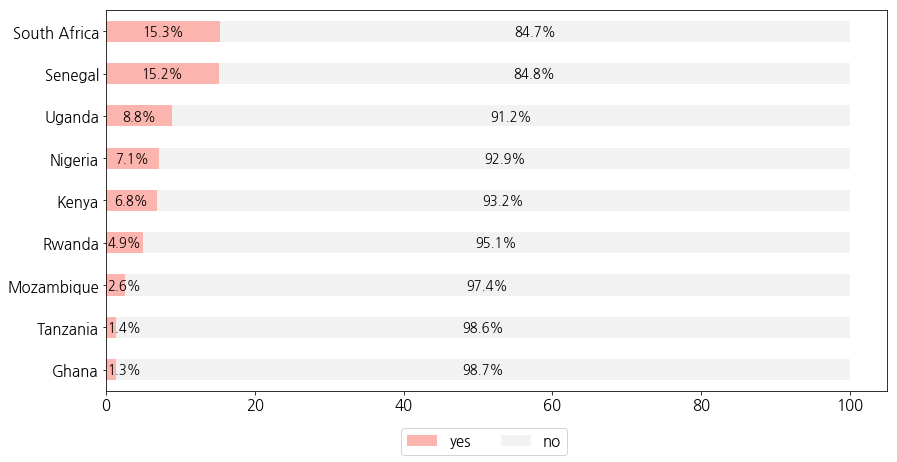

In [376]:
df_bd = df_b.dropna(subset = ['B9']).replace('0. No', 0, regex=True).replace('1. Yes', 1, regex=True).replace(' ', np.NaN)
df_bd['A5']=df_bd['A5'].str.extract('([a-zA-Z]+\s?[a-zA-Z]+)')
df_by = df_bd[df_bd['B9']==1]['A5'].value_counts()
df_bn = df_bd[df_bd['B9']==0]['A5'].value_counts()
df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
df_p = df_p.div(df_p.sum(axis=0), axis =1)*100
df_p.index = ['yes', 'no']

ax = df_p.T.sort_values('yes', ascending=True).plot(kind='barh', stacked = True, colormap='Pastel1', figsize = (14,7), fontsize = 15)
plt.legend(bbox_to_anchor=(0.6,-0.7/9), ncol=2, prop={'size': 15})
for i, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    if i<9:
        if width<5:
            ax.annotate(str(round(width,1))+"%", (left+2.5, bottom+height*0.3), ha='center', fontsize = 13)
        else:
            ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
    else:
        ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
    

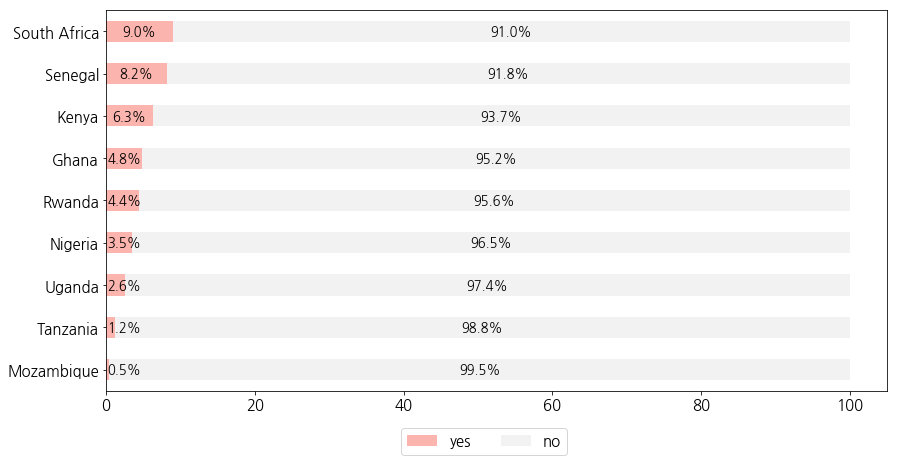

In [373]:
df_bd = df_b.dropna(subset = ['BS2']).replace('0. No', 0, regex=True).replace('1. Yes', 1, regex=True).replace(' ', np.NaN)
df_bd['A5']=df_bd['A5'].str.extract('([a-zA-Z]+\s?[a-zA-Z]+)')
df_by = df_bd[df_bd['BS2']==1]['A5'].value_counts()
df_bn = df_bd[df_bd['BS2']==0]['A5'].value_counts()
df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
df_p = df_p.div(df_p.sum(axis=0), axis =1)*100
df_p.index = ['yes', 'no']

ax = df_p.T.sort_values('yes', ascending=True).plot(kind='barh', stacked = True, colormap='Pastel1', figsize = (14,7), fontsize = 15)
plt.legend(bbox_to_anchor=(0.6,-0.7/9), ncol=2, prop={'size': 15})
for i, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    if i<9:
        if width<5:
            ax.annotate(str(round(width,1))+"%", (left+2.5, bottom+height*0.3), ha='center', fontsize = 13)
        else:
            ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
    else:
        ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
    

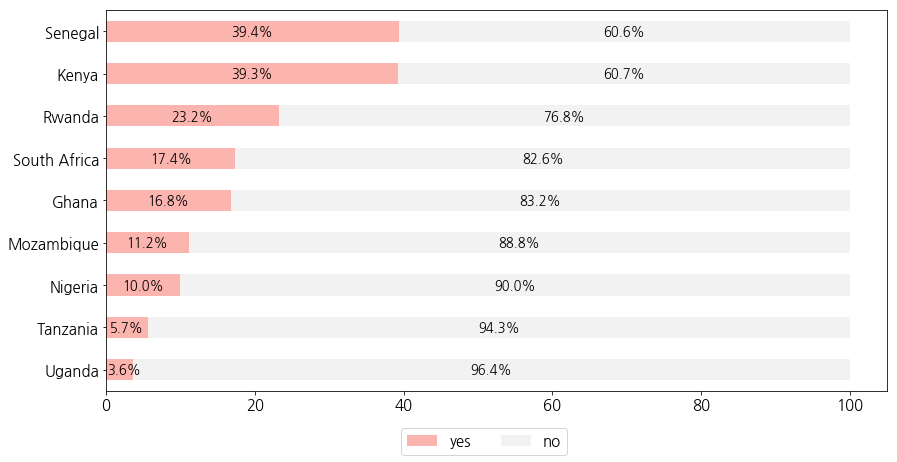

In [374]:
df_bd = df_b.dropna(subset = ['B10']).replace('0. No', 0, regex=True).replace('1. Yes', 1, regex=True).replace(' ', np.NaN)
df_bd['A5']=df_bd['A5'].str.extract('([a-zA-Z]+\s?[a-zA-Z]+)')
df_by = df_bd[df_bd['B10']==1]['A5'].value_counts()
df_bn = df_bd[df_bd['B10']==0]['A5'].value_counts()
df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
df_p = df_p.div(df_p.sum(axis=0), axis =1)*100
df_p.index = ['yes', 'no']

ax = df_p.T.sort_values('yes', ascending=True).plot(kind='barh', stacked = True, colormap='Pastel1', figsize = (14,7), fontsize = 15)
plt.legend(bbox_to_anchor=(0.6,-0.7/9), ncol=2, prop={'size': 15})
for i, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    if i<9:
        if width<5:
            ax.annotate(str(round(width,1))+"%", (left+2.5, bottom+height*0.3), ha='center', fontsize = 13)
        else:
            ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
    else:
        ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
    

In [298]:
#Cases Represented as Percentages (Yes Percentage)
def plot_yn(var_name, index): #put var_name the lists
    df_training = df_b[var_name].replace('0', 0, regex=True).replace('1', 1, regex=True).replace(' ', np.NaN)
    df_stack = pd.DataFrame((df_training.mean()*100).T, columns = ['Yes'])
    df_stack['No'] = 100 - df_stack['Yes']
    df_stack.index = index
    ax = df_stack.sort_values('Yes', ascending=True).plot(kind='barh', stacked=True, figsize = (14,len(var_name)), colormap = 'Pastel1', fontsize = 15)
    plt.legend(bbox_to_anchor=(0.6,-0.7/len(var_name)), ncol=2, prop={'size': 15})
    for i, p in enumerate(ax.patches):
        left, bottom, width, height = p.get_bbox().bounds
        if i<len(var_name):
            if width<5:
                ax.annotate(str(round(width,1))+"%", (left+2.5, bottom+height*0.3), ha='center', fontsize = 13)
            else:
                ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)
        else:
            ax.annotate(str(round(width,1))+"%", (left+width*0.5, bottom+height*0.3), ha='center', fontsize = 13)


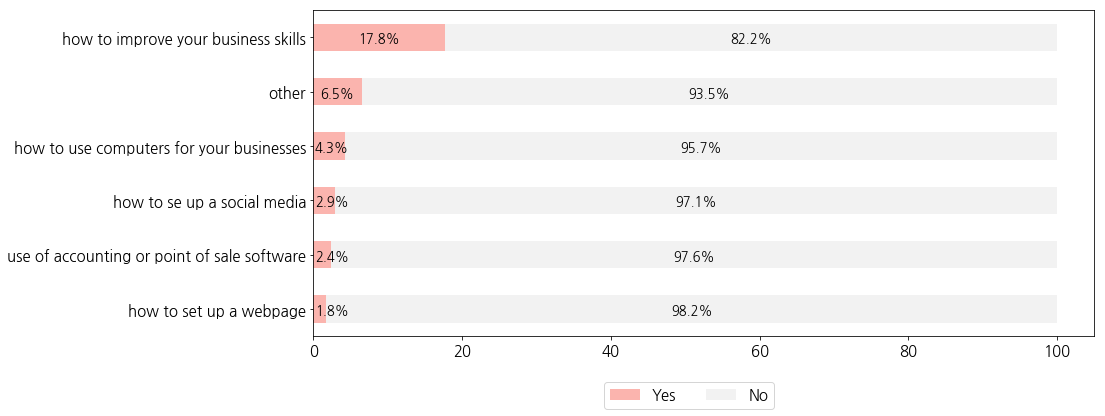

In [299]:
#Have you received training?
plot_yn(['BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6'], 
       ['how to improve your business skills', 'how to use computers for your businesses', 'how to set up a webpage', 'how to se up a social media', 'use of accounting or point of sale software', 'other'])

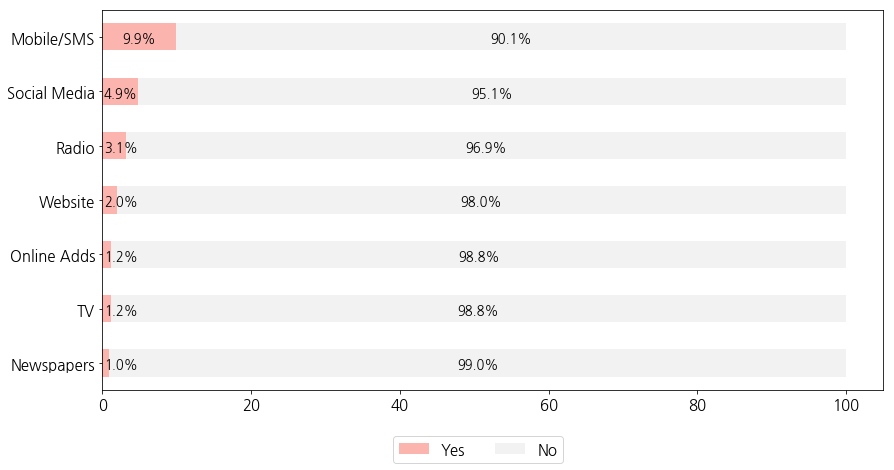

In [300]:
#How does the business advertise?
plot_yn(['D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35'], ['Radio','TV','Newspapers','Mobile/SMS','Social Media', 'Website', 'Online Adds'])

In [325]:
len(df_b[df_b['C2'].isnull()])+len(df_b[df_b['C2']==0])

19

,RIAserial,A1,A1b,A2,A3,A4b,A4s,A5,A6,education,...,F13,F14,F15,BC1,BC2,BC3,BC4,Posto,Latitude,Longitude
2062,RW140,1109010401,,Nyamagabe,Munyerere,Munyerere,,5. Rwanda,0. Rural,NaN,...,0.0,0.0,0.0,2. Bad,3. Fair,1. Much less,1. Much less,,-2.412543,29.619002
2064,RW142,3410030601,,Nyamagabe,Gasaka,Gasaka,,5. Rwanda,1. Urban,NaN,...,0.0,0.0,0.0,4. Good,4. Good,4. More,4. More,,-2.471545,29.579647
2072,RW150,3601020801,,Nyamagabe,Gasaka,Gasaka,,5. Rwanda,1. Urban,NaN,...,500000.0,0.0,0.0,4. Good,5. Very good,3. Same,4. More,,-2.472363,29.581085
2200,RW278,5105040701,,Musanze,Muhoza,Muhoza,,5. Rwanda,1. Urban,NaN,...,0.0,0.0,0.0,2. Bad,2. Bad,3. Same,3. Same,,-1.504795,29.610704
2209,RW287,5205030201,,Burera,Gahunga,Gahunga,,5. Rwanda,1. Urban,NaN,...,0.0,0.0,0.0,3. Fair,4. Good,3. Same,3. Same,,-1.455962,29.694852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,UG670,165,,,,,,8. Uganda,NaN,1. None,...,0.0,0.0,0.0,1. Very Bad,1. Very Bad,1. Much less,1. Much less,,1.943028,32.137619
3880,UG679,231,,,,,,8. Uganda,NaN,4. Tertiary:Diploma/Certificate,...,0.0,0.0,0.0,4. Good,4. Good,3. Same,4. More,,-1.041380,30.653854
3884,UG683,231,,,,,,8. Uganda,NaN,1. None,...,0.0,0.0,0.0,2. Bad,2. Bad,3. Same,4. More,,-1.041898,30.657236
3890,UG689,260,,,,,,8. Uganda,NaN,2. Primary,...,0.0,0.0,0.0,3. Fair,4. Good,3. Same,4. More,,-0.320443,31.762354


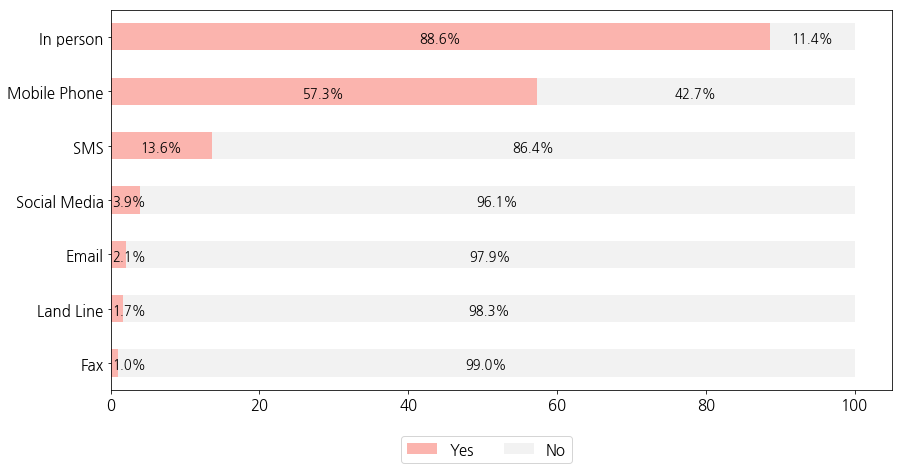

In [301]:
#How does the business usually communicate with its suppliers?
plot_yn(['S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18'], ['Mobile Phone','Land Line','Email','SMS','Fax', 'In person', 'Social Media'])

In [271]:
df_b[['C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18']].replace('0', 0, regex=True).replace('1', 1, regex=True)['C12'].replace(' ', np.NaN)[56]

nan

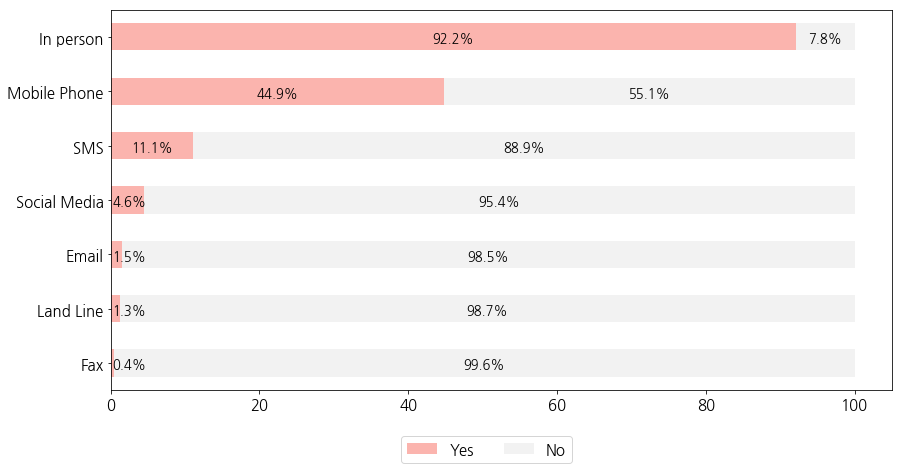

In [302]:
#How does the business usually communicate with its customers?
plot_yn(['C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18'], ['Mobile Phone','Land Line','Email','SMS','Fax', 'In person', 'Social Media'])

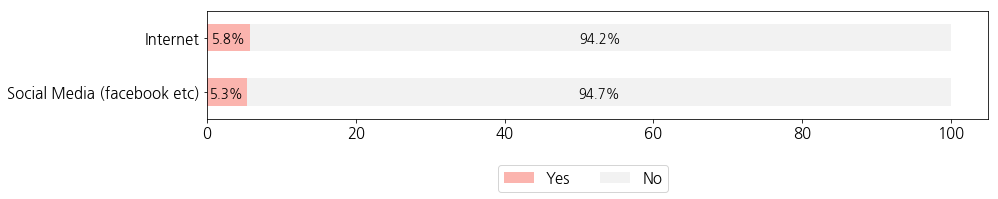

In [303]:
#Who do you rely on for tips and advises on how to run and improve your business?
plot_yn(['BS13', 'BS14'], ['Internet', 'Social Media (facebook etc)'])

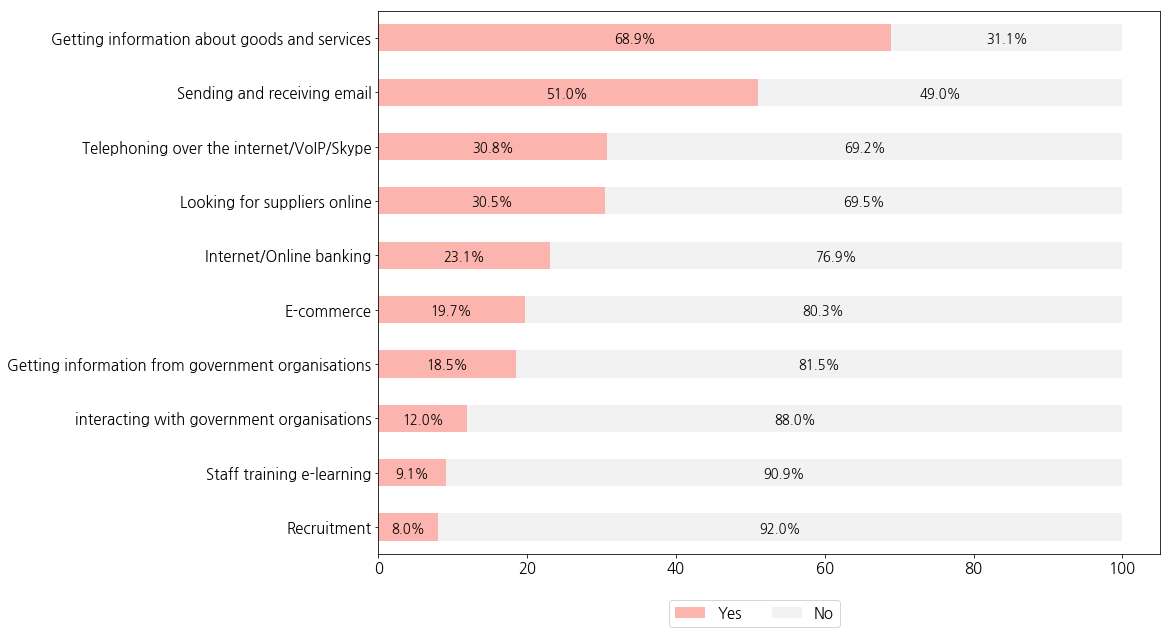

In [304]:
#What do you use the internet for?
plot_yn(['I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15'], ['Sending and receiving email', 'Telephoning over the internet/VoIP/Skype','Getting information about goods and services','Getting information from government organisations','interacting with government organisations',
              'Internet/Online banking','E-commerce','Recruitment','Staff training e-learning','Looking for suppliers online'])

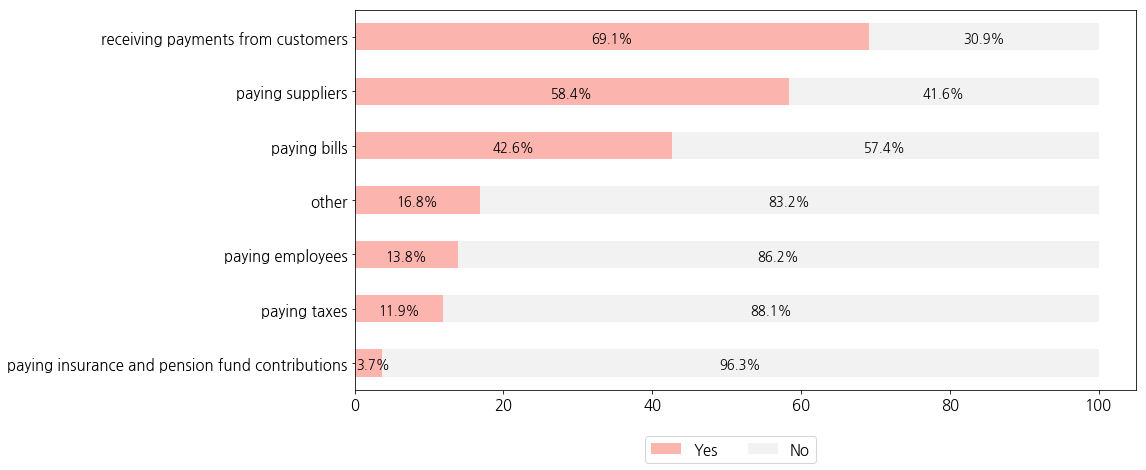

In [305]:
#Does the business use mobile money for?
plot_yn(['MM2', 'MM3', 'MM4', 'MM5', 'MM6', 'MM7', 'MM8'], ['paying employees', 'paying insurance and pension fund contributions','paying suppliers','paying bills','paying taxes',
              'receiving payments from customers','other'])

In [ ]:
#변수 특성별 연체율 그래프 함수
def bar_chart(feature, year):
    df = dflist[year]
    yes = df[df['원리금연체유무']==1][feature].value_counts()
    no = df[df['원리금연체유무']==0][feature].value_counts()
    df_p = pd.DataFrame([yes, no]).sort_index(axis =1)
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['연체O', '연체X']
    if feature == '가구주_산업대분류코드':
        df_p.columns = df_ind['분류명'].to_list()
        df_p = df_p.T.sort_values(by='연체O', ascending =False).T.iloc[:,:5]
    else:
        df_p.columns = df_code[df_code['변수']==feature]['코드설명'].to_list()
    df_p.T.plot(kind='bar', stacked = True, figsize = (10,5), colormap='cividis')
    plt.title(f'{year+2017}년 {feature}에 따른 원리금 연체 유무')
    
    return df_p

In [364]:
len(df_b.dropna())

0

In [369]:
df_b['D33'].isnull().sum()

15

In [57]:
df_vb[df_vb['var_name']=='D27']['question'][0]

'Does your business have a website?'

In [115]:
df_vb[df_vb['var_name']=='D28']['question'].to_list()

['Does your business maintain a social media presence (facebook eg)?']

In [6]:
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 30,
             'xtick.labelsize':20, 'ytick.labelsize':12}
plt.rcParams.update(parameters)

In [206]:
# Differences in Characteristics Based on Digital Platform Usage
def df_yesno_diff(var):
    var_name = df_vb[df_vb['var_name']==var]['question'].to_list()[0]
    plt.suptitle(var_name, fontsize = 40)
    
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.9)
    ax1 = plt.subplot(331)
    df_bd = df_b.dropna(subset = [var])
    
    df_by = df_bd[df_bd[var]==1]['A5'].value_counts()
    df_bn = df_bd[df_bd[var]==0]['A5'].value_counts()
    df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['yes', 'no']

    df_p.T.plot(kind='bar', stacked = True, colormap='cividis', ax = ax1, figsize = (40, 40))
    plt.legend(loc ='upper right', prop={'size': 20})
    plt.title('country')
    for x in range(9):
        left, bottom, width, height = ax1.patches[x].get_bbox().bounds
        ax1.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
    
    ax2 = plt.subplot(332)
    df_by = df_bd[df_bd[var]==1]['D10_Category'].value_counts()
    df_bn = df_bd[df_bd[var]==0]['D10_Category'].value_counts()
    df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['yes', 'no']
    df_p.T.plot(kind='bar', stacked = True, figsize = (40, 40), colormap='cividis', ax = ax2)
    plt.title('In what year was the business established?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(5):
        left, bottom, width, height = ax2.patches[x].get_bbox().bounds
        ax2.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)

    ax3 = plt.subplot(333)
    df_by = df_bd[df_bd[var]==1]['D21a'].value_counts()
    df_bn = df_bd[df_bd[var]==0]['D21a'].value_counts()
    df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['yes', 'no']
    df_p.T.plot(kind='bar', stacked = True, figsize = (40, 40), colormap='cividis', ax = ax3, fontsize = 20)
    plt.title('Highest formal education level of the business manager?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(6):
        left, bottom, width, height = ax3.patches[x].get_bbox().bounds
        ax3.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
        
    ax4 = plt.subplot(334)
    df_by = df_bd[df_bd[var]==1]['BC1'].value_counts()
    df_bn = df_bd[df_bd[var]==0]['BC1'].value_counts()
    df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['yes', 'no']
    df_p.T.plot(kind='bar', stacked = True, figsize = (40, 40), colormap='cividis', ax = ax4, fontsize = 20)
    plt.title('How do you rate the current performance of your business?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(5):
        left, bottom, width, height = ax4.patches[x].get_bbox().bounds
        ax4.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
        
    ax5 = plt.subplot(335)
    df_by = df_bd[df_bd[var]==1]['D1'].value_counts()
    df_bn = df_bd[df_bd[var]==0]['D1'].value_counts()
    df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['yes', 'no']
    df_p.T.plot(kind='bar', stacked = True, figsize = (40, 40), colormap='cividis', ax = ax5, fontsize = 20)
    plt.title('What is the form of ownership of your business?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(5):
        left, bottom, width, height = ax5.patches[x].get_bbox().bounds
        ax5.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
        
    ax6 = plt.subplot(336)
    df_by = df_bd[df_bd[var]==1]['D6'].value_counts().drop('99')
    df_bn = df_bd[df_bd[var]==0]['D6'].value_counts().drop('99')
    df_p = pd.DataFrame([df_by, df_bn])
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['yes', 'no']
    df_p.columns = ['registered', 'not registered']
    df_p.T.plot(kind='bar', stacked = True, figsize = (40, 40), colormap='cividis', ax = ax6, fontsize = 20)
    plt.title('Is your business registered with any local authority/municipality?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(2):
        left, bottom, width, height = ax6.patches[x].get_bbox().bounds
        ax6.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
        
    ax7 = plt.subplot(337)
    df_by = df_bd[df_bd[var]==1]['D21c'].dropna()
    df_bn = df_bd[df_bd[var]==0]['D21c'].dropna()
    sns.distplot(df_by, ax = ax7, label = 'yes')
    sns.distplot(df_bn, ax = ax7, label = 'no')
    ax7.text(80, 0.009, f'yes mean : {round(df_by.mean(),2)}')
    ax7.text(80, 0.003, f'no mean : {round(df_bn.mean(),2)}')
    plt.title("What is the manager's age?")
    plt.legend(loc ='upper right', prop={'size': 20})
    
    ax8 = plt.subplot(338)
    df_by = df_bd[df_bd[var]==1]['D20c'].dropna().astype('int')
    df_bn = df_bd[df_bd[var]==0]['D20c'].dropna().astype('int')
    sns.distplot(df_by, ax = ax8, label = 'yes')
    sns.distplot(df_bn, ax = ax8, label = 'no')
    ax8.text(80, 0.009, f'yes mean : {round(df_by.mean(),2)}')
    ax8.text(80, 0.003, f'no mean : {round(df_bn.mean(),2)}')
    plt.title("What is the owner's age?")
    plt.legend(loc ='upper right', prop={'size': 20})
    
    ax9 = plt.subplot(339)
    df_2 = df_bd[df_bd['D2a']==1][var].value_counts()
    df_3 = df_bd[df_bd['D3a']==1][var].value_counts()
    df_4 = df_bd[df_bd['D4a']==1][var].value_counts()
    df_5 = df_bd[df_bd['D5a']==1][var].value_counts()
    df_p = pd.DataFrame([df_2, df_3, df_4, df_5]).sort_index(axis=1)
    df_p = df_p.div(df_p.sum(axis=1), axis =0)
    df_p.index = ['producing agricultural products', 'manufacturing products','selling goods/trading','providing a service']
    df_p.columns = ['no', 'yes']
    df_p = df_p[['yes', 'no']]
    df_p.plot(kind='bar', stacked = True, figsize = (40, 40), colormap='cividis', ax = ax9, fontsize = 20)
    plt.title('Industry')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(4):
        left, bottom, width, height = ax9.patches[x].get_bbox().bounds
        ax9.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
        
        

Text(0.5,1,'Data Distribution by country')

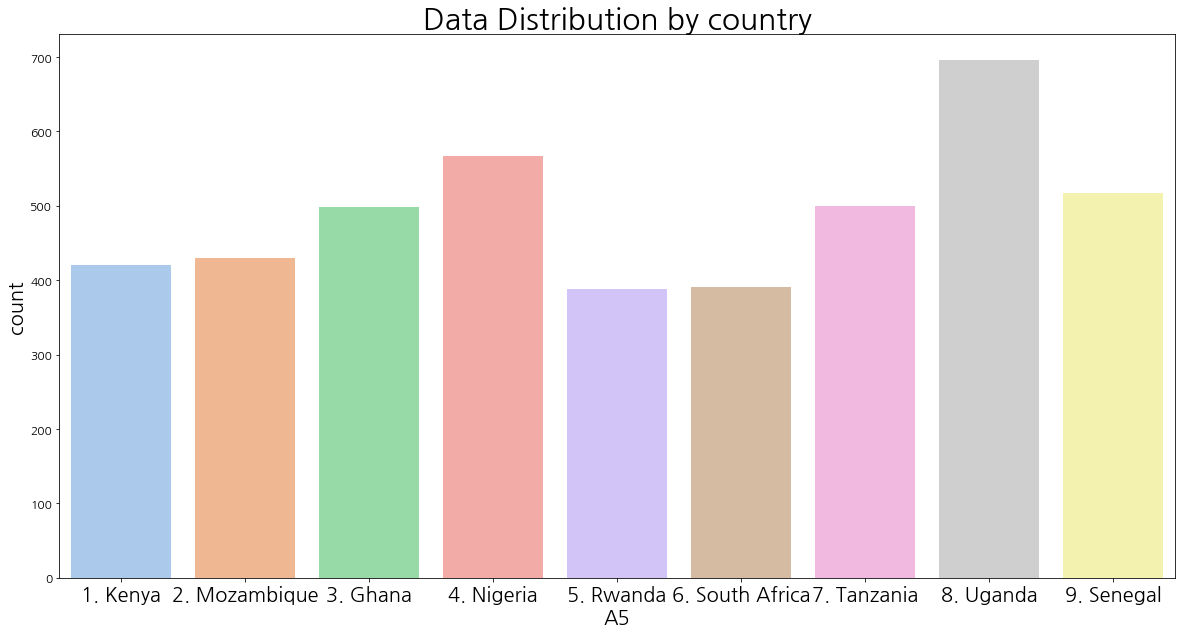

In [125]:
plt.figure(figsize = (20,10))
sns.set_palette("pastel")
sns.countplot(x='A5', data = df_b)
plt.title('Data Distribution by country')

In [320]:
df_p*100

,1. Kenya,2. Mozambique,3. Ghana,4. Nigeria,5. Rwanda,6. South Africa,7. Tanzania,8. Uganda,9. Senegal
yes,6.837607,2.55814,1.290323,7.142857,4.929577,15.345269,1.414141,8.823529,15.151515
no,93.162393,97.44186,98.709677,92.857143,95.070423,84.654731,98.585859,91.176471,84.848485


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


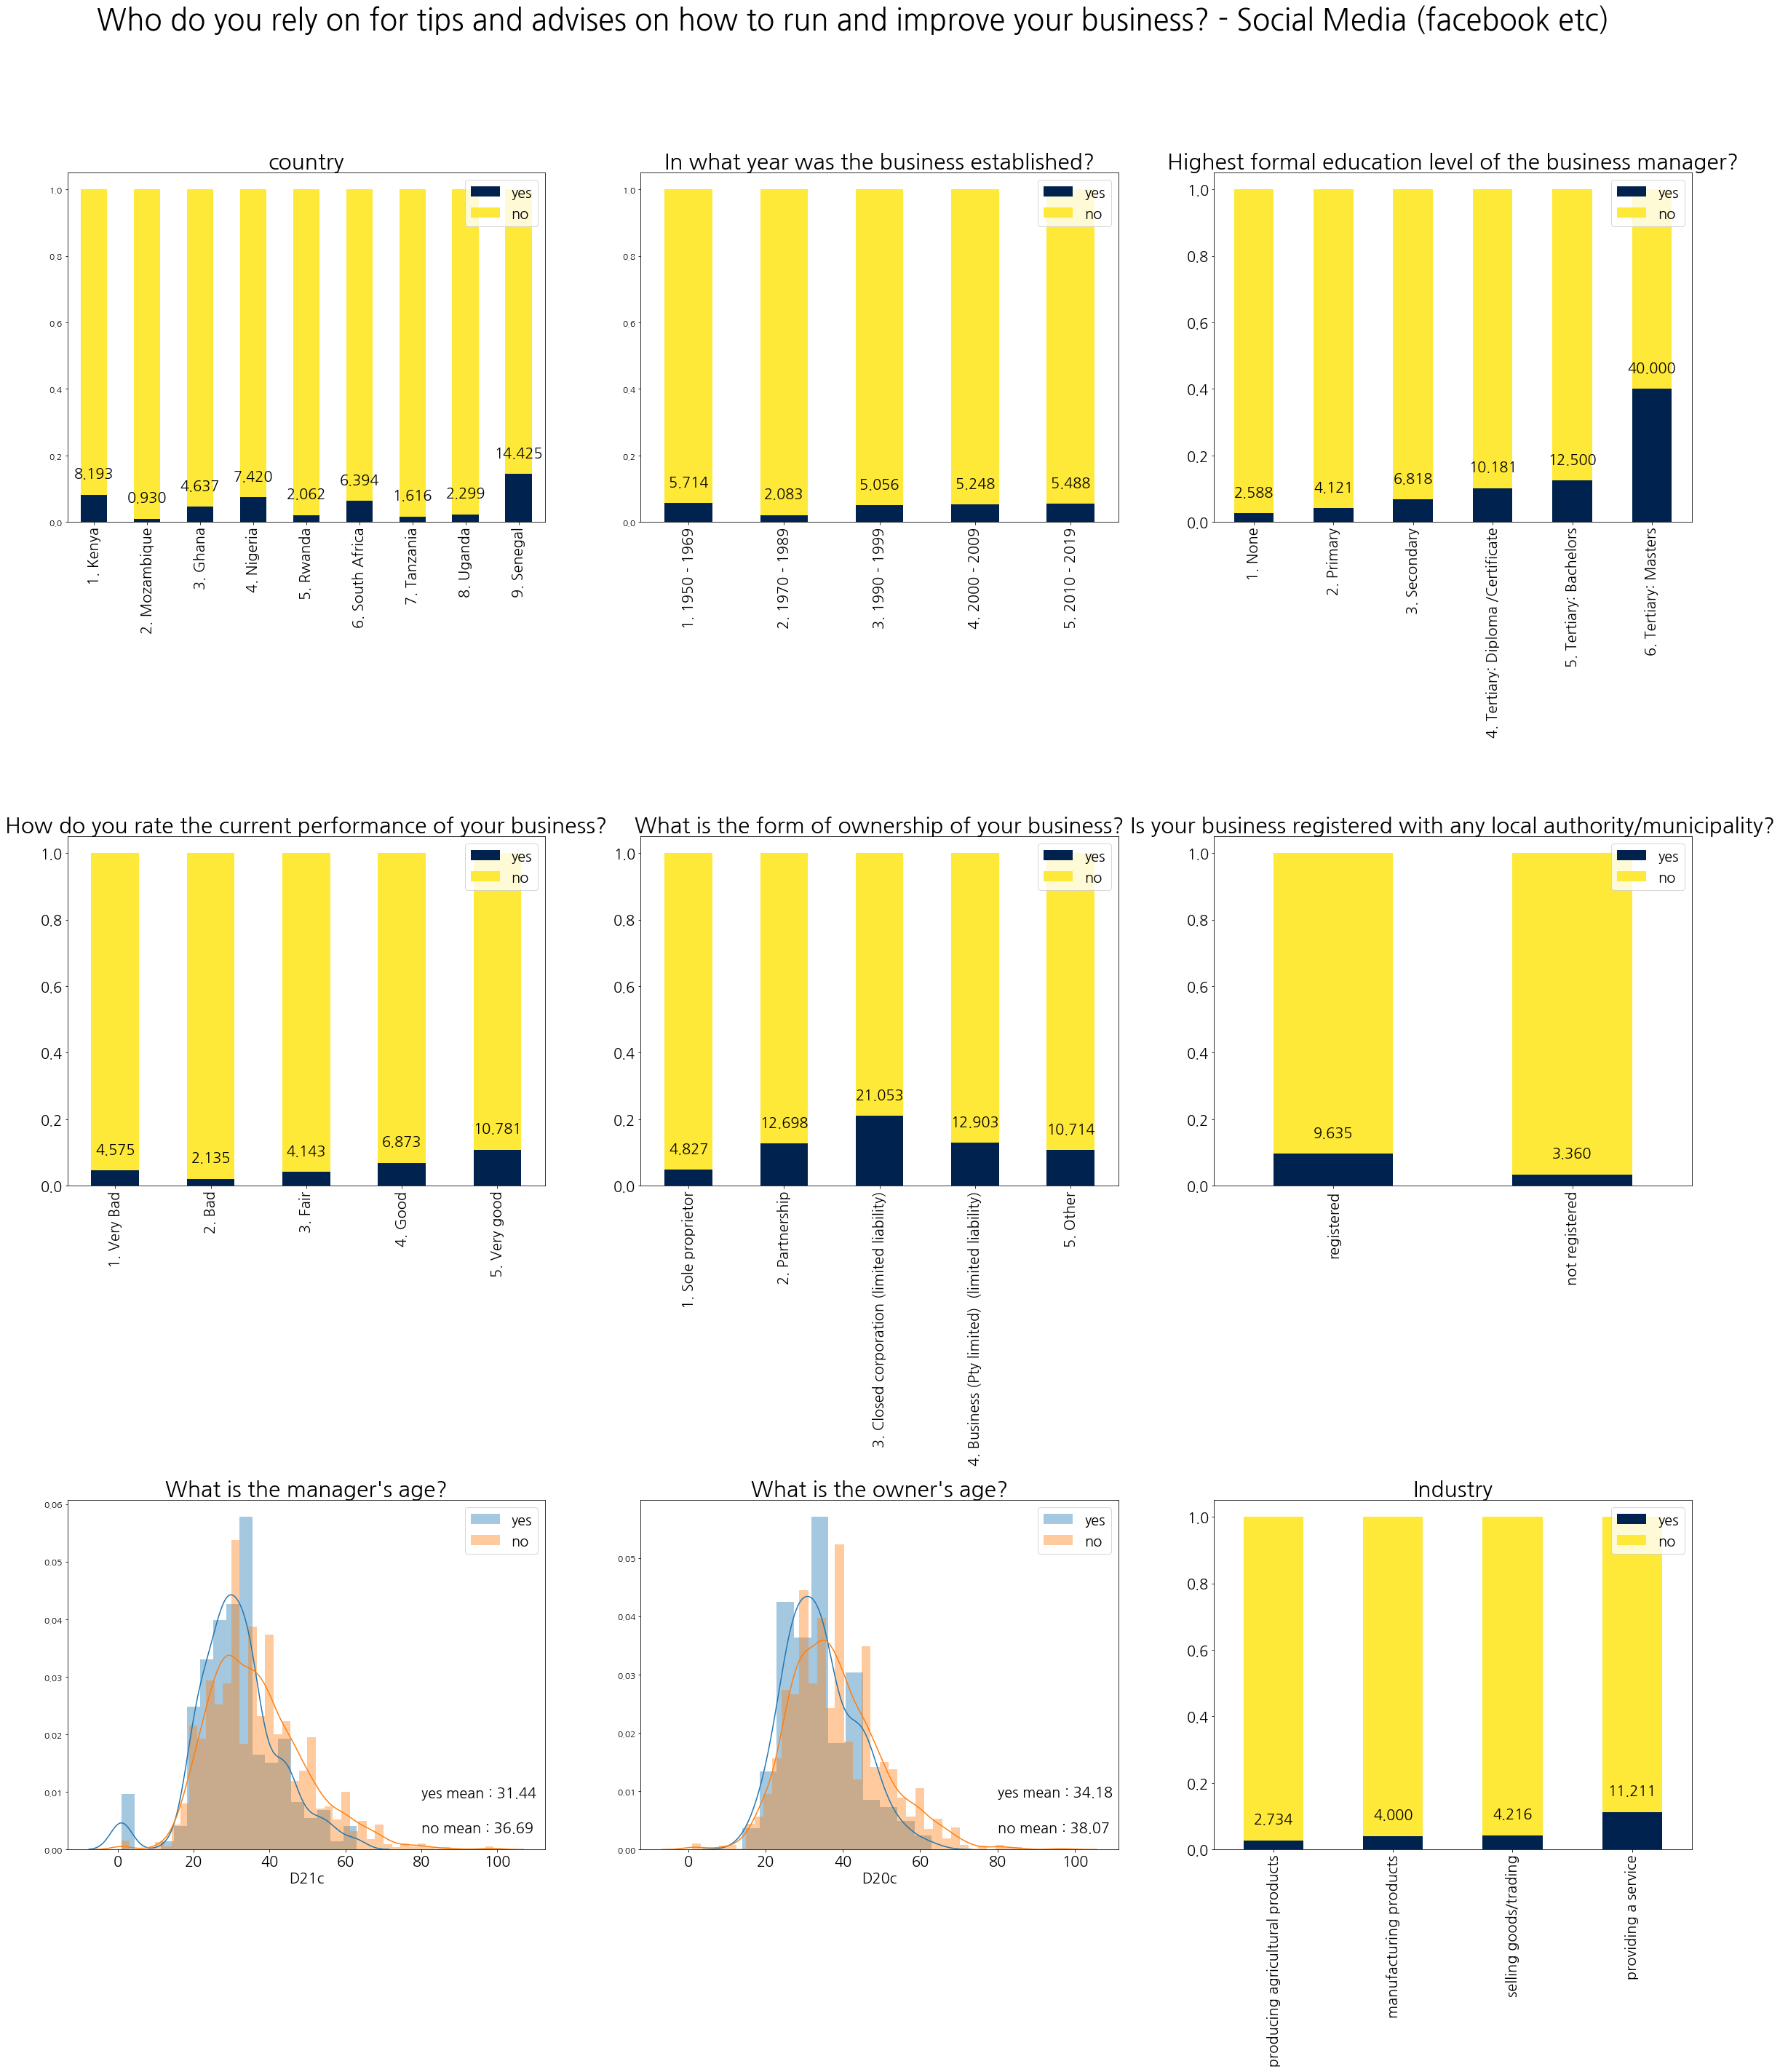

In [207]:
df_yesno_diff('BS14')

In [182]:
# Differences in Characteristics Based on Digital Platform Usage regarding suppliers
def df_yesno_diff_s(var):
    var_name = df_vb[df_vb['var_name']==var]['question'].to_list()[0]
    plt.suptitle(var_name, fontsize = 40)
    fig_s = (35, 25)

    df_bd = df_b.dropna(subset = [var])
    
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.6, hspace=0.9)
    
    ax1 = plt.subplot(231)
    df_2 = df_bd[df_bd['S3']=='1. Yes'][var].value_counts()
    df_3 = df_bd[df_bd['S4']=='1. Yes'][var].value_counts()
    df_4 = df_bd[df_bd['S5']=='1. Yes'][var].value_counts()
    df_p = pd.DataFrame([df_2, df_3, df_4]).sort_index(axis=1)
    df_p = df_p.div(df_p.sum(axis=1), axis =0)
    df_p.index = ['Locally(surrounding towns and villages)', 'From all over the country','Abroad']
    df_p.columns = ['no', 'yes']
    df_p = df_p[['yes', 'no']]
    df_p.plot(kind='bar', stacked = True, figsize = fig_s, colormap='cividis', ax = ax1, fontsize = 20)
    plt.title('Where are the most important suppliers located(furthest away)?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(3):
        left, bottom, width, height = ax1.patches[x].get_bbox().bounds
        ax1.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
        
    
    ax2 = plt.subplot(232)
    df_2 = df_bd[df_bd['S6']=='1. Yes'][var].value_counts()
    df_3 = df_bd[df_bd['S7']=='1. Yes'][var].value_counts()
    df_4 = df_bd[df_bd['S8']=='1. Yes'][var].value_counts()
    df_p = pd.DataFrame([df_2, df_3, df_4]).sort_index(axis=1)
    df_p = df_p.div(df_p.sum(axis=1), axis =0)
    df_p.index = ['informal business', 'small formal business','large formal business']
    df_p.columns = ['no', 'yes']
    df_p = df_p[['yes', 'no']]
    df_p.plot(kind='bar', stacked = True, figsize = fig_s, colormap='cividis', ax = ax2, fontsize = 20)
    plt.title('Who are your main suppliers?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(3):
        left, bottom, width, height = ax1.patches[x].get_bbox().bounds
        ax2.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)

    ax3 = plt.subplot(233)
    df_by = df_bd[df_bd[var]==1]['S11'].value_counts()
    df_bn = df_bd[df_bd[var]==0]['S11'].value_counts()
    df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['yes', 'no']
    df_p.T.plot(kind='bar', stacked = True, figsize = fig_s, colormap='cividis', ax = ax3, fontsize = 20)
    plt.title('How often do you communication with your most important suppliers?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(4):
        left, bottom, width, height = ax3.patches[x].get_bbox().bounds
        ax3.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
        
    ax4 = plt.subplot(234)
    df_by = df_bd[df_bd[var]==1]['S10'].value_counts()
    df_bn = df_bd[df_bd[var]==0]['S10'].value_counts()
    df_p = pd.DataFrame([df_by, df_bn]).sort_index(axis =1)
    df_p = df_p.div(df_p.sum(axis=0), axis =1)
    df_p.index = ['yes', 'no']
    df_p.T.plot(kind='bar', stacked = True, figsize = fig_s, colormap='cividis', ax = ax4, fontsize = 20)
    plt.title('How reliable are the most important suppliers?')
    plt.legend(loc ='upper right', prop={'size': 20})
    for x in range(5):
        left, bottom, width, height = ax4.patches[x].get_bbox().bounds
        ax4.annotate("%.3f"%(height*100), (left+width/2, height+0.05), ha='center', fontsize = 20)
        
    ax5 = plt.subplot(235)
    df_T = df_bd[pd.DataFrame([df_bd['S1'].dropna().astype('int')>100]['S1']=='True')]
    df_bc = df_bd.drop()
    df_by = df_bc[df_bc[var]==1]['S1'].dropna().astype('int')
    df_bn = df_bc[df_bc[var]==0]['S1'].dropna().astype('int')
    sns.distplot(df_by, ax = ax5, label = 'yes')
    sns.distplot(df_bn, ax = ax5, label = 'no')
    ax5.text(3.7, 3300, f'yes mean : {df_by.mean()}')
    plt.title("How many suppliers does your business have?")
    plt.legend(loc ='upper right', prop={'size': 20})
    plt.xlim([0,50])    
    ax6 = plt.subplot(236)
    df_by = df_bd[df_bd[var]==1]['S2'].dropna().astype('int')
    df_bn = df_bd[df_bd[var]==0]['S2'].dropna().astype('int')
    sns.distplot(df_by, ax = ax6, label = 'yes')
    sns.distplot(df_bn, ax = ax6, label = 'no')
    plt.title("How many suppliers have you met face to face?")
    plt.legend(loc ='upper right', prop={'size': 20})
    plt.xlim([0,50])
        

In [33]:
df_b['S2'].dropna().astype('int').mean()

4.663636363636364

In [126]:
pd.DataFrame(pd.DataFrame(df_b['S1'].dropna().astype('int'))['S1']>100)['S1']=='True'

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0       False
1       False
2       False
3       False
4       False
        ...  
4410    False
4415    False
4416    False
4417    False
4418    False
Name: S1, Length: 4389, dtype: bool

In [99]:
pd.DataFrame(df_b['S2'].dropna().astype('int')>100).sort_values(by = 'S2')

,S2
0,False
3038,False
3039,False
3040,False
3041,False
...,...
1706,False
4418,False
1077,True
451,True


In [139]:
df_ad = df_b[['D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36']]

In [154]:
df_ad_no

,D29,D30,D31,D32,D33,D34,D35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4406,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4408,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4410,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4416,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
df_ad_no = df_ad[df_ad['D29']==0]['D29']
for x in ['D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35'][1:]:
    df_ad_no = pd.merge(df_ad_no, df_ad[df_ad[x]==0][x], left_index = True, right_index = True)
df_ad_no = pd.merge(df_ad_no, df_ad['D36'], left_index = True, right_index =True)

In [242]:
df_ad_no = df_b[df_b['I6']==0]['I6']
for x in ['I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15'][1:]:
    df_ad_no = pd.merge(df_ad_no, df_b[df_b[x]==0][x], left_index = True, right_index = True)
len(df_ad_no)

35

In [243]:
len(df_b[['I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15']].dropna())

352

In [306]:
df_ad_no = df_training[df_training['BS1']==0]['BS1']
for x in ['BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6'][1:]:
    df_ad_no = pd.merge(df_ad_no, df_training[df_training[x]==0][x], left_index = True, right_index = True)
len(df_ad_no)

3340

Text(0.5,1,'Have you received training?')

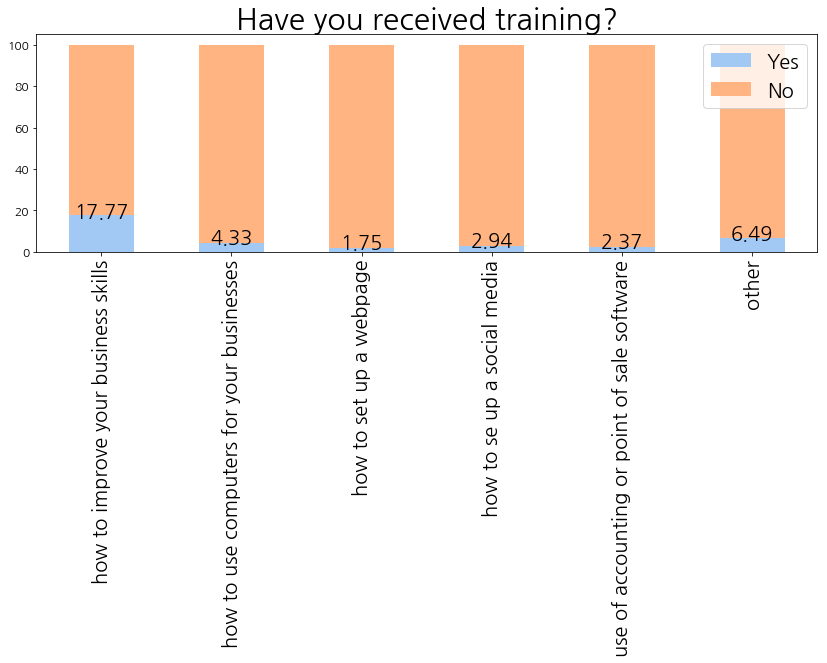

In [302]:
df_training = df_b[['BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6']].replace('0', 0, regex=True).replace('1', 1, regex=True)
df_stack = pd.DataFrame((df_training.mean()*100).T, columns = ['Yes'])
df_stack['No'] = 100 - df_stack['Yes']
df_stack.index = ['how to improve your business skills', 'how to use computers for your businesses', 'how to set up a webpage', 'how to se up a social media', 'use of accounting or point of sale software', 'other']
ax = df_stack.plot(kind='bar', stacked=True)
for p in ax.patches[:6]:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height), (left+width/2, height*0.95), ha='center')
plt.title('Have you received training?')

In [411]:
df_b['D1'].unique()

array(['1. Sole proprietor', '2. Partnership', '5. Other',
       '4. Business (Pty limited)  (limited liability)',
       '3. Closed corporation (limited liability)'], dtype=object)

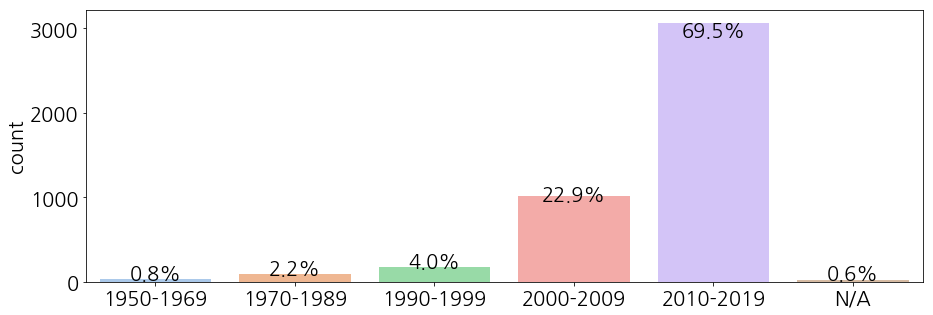

In [515]:
plt.figure(figsize=(15,5))
sns.set_palette("pastel")
df_tmp = df_b['D10_Category'].fillna('N/A').replace('1. 1950 - 1969', '1950-1969').replace('2. 1970 - 1989', '1970-1989').replace('3. 1990 - 1999', '1990-1999').replace('4. 2000 - 2009', '2000-2009').replace('5. 2010 - 2019', '2010-2019')
df_tmp = pd.DataFrame(df_tmp, columns = ['D10_Category'])
df_sum = len(df_tmp)
ax = sns.countplot(x='D10_Category', data = df_tmp, order = ['1950-1969', '1970-1989','1990-1999', '2000-2009', '2010-2019', 'N/A'])
plt.xlabel("")
# plt.title(df_vbi.loc['D10_Category']['question'], fontsize = 20)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str("%.1f"%(height/df_sum*100))+"%", (left+width/2, height*0.95), ha='center')
# ax.text(3.7, 3300, f'obs:{df_sum}')
# ax.set_visible(False)

In [438]:
df_tmp['BC1'].unique()

array(['2. Bad', '3. Fair', '1. Very Bad', '5. Very good', '4. Good'],
      dtype=object)

In [431]:
ax.patches[4].get_bbox().bounds

(3.6, 0.0, 0.8000000000000003, 28.0)

In [444]:
df_tmp['D20a'].unique()

array(['2. Primary', '3. Secondary', '4. Tertiary: Diploma /Certificate',
       '5. Tertiary: Bachelors', '1. None', '6. Tertiary: Masters'],
      dtype=object)

Text(0.5,0,'')

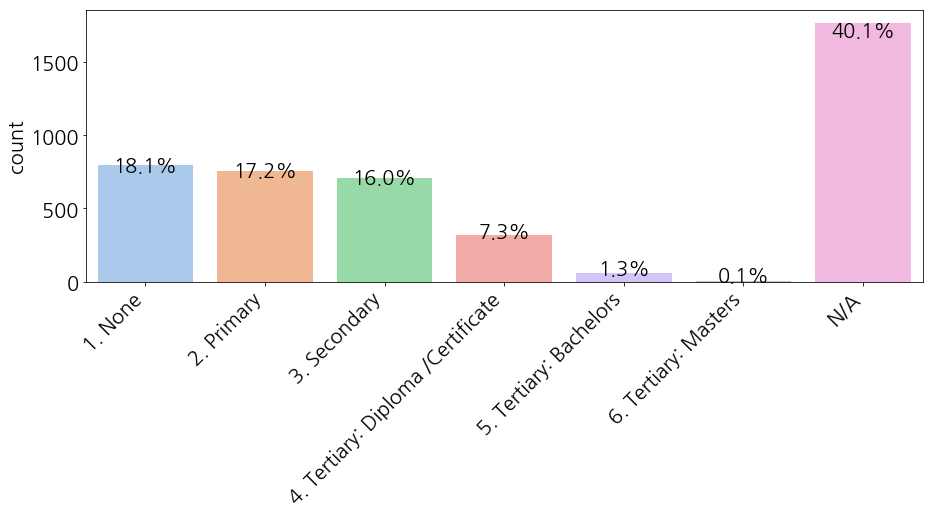

In [529]:
plt.figure(figsize=(15,5))
sns.set_palette("pastel")
df_tmp = pd.DataFrame(df_b['D20a'].fillna('N/A'))
df_sum = len(df_tmp)
ax = sns.countplot(x='D20a', data = df_tmp,order = ['1. None', '2. Primary','3. Secondary', '4. Tertiary: Diploma /Certificate', '5. Tertiary: Bachelors', '6. Tertiary: Masters', 'N/A'])

# plt.title(df_vbi.loc['D21a']['question'], fontsize = 20)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height >0:
        ax.annotate(str("%.1f"%(height/df_sum*100))+"%", (left+width/2, height*0.95), ha='center')
#     plt.text(left+ width/2,height-1.2, ha='center',s=round(height,2), size = 20)
# ax.text(4.7, 1550, f'obs:{df_sum}')
# for x in ax.p:
#     h = x.get_height()
#     plt.text(x.get_x()+x.get_width()/2,h-1.2, ha='center',s=round(h,2), size = 20)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("")

Text(0.5,0,'')

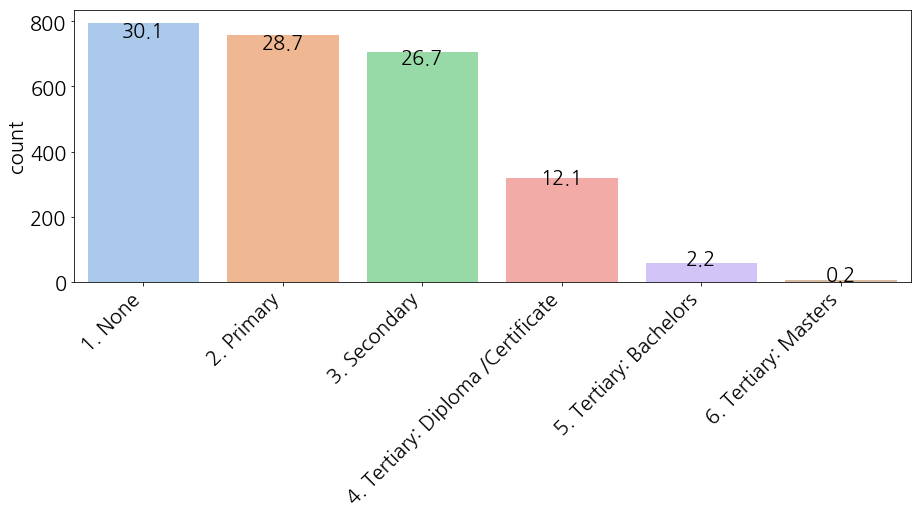

In [531]:
plt.figure(figsize=(15,5))
sns.set_palette("pastel")
df_tmp = pd.DataFrame(df_b['D20a'].dropna())
df_sum = len(df_tmp)
ax = sns.countplot(x='D20a', data = df_tmp, order = ['1. None', '2. Primary','3. Secondary', '4. Tertiary: Diploma /Certificate', '5. Tertiary: Bachelors', '6. Tertiary: Masters'])

# plt.title(df_vbi.loc['D20a']['question'], fontsize = 20)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height >0:
        ax.annotate("%.1f"%(height/df_sum*100), (left+width/2, height*0.95), ha='center')
# ax.text(4.7, 850, f'obs:{df_sum}')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("")

In [537]:
ax.patches[4].get_bbox().bounds

(3.6, 0.0, 0.8000000000000003, nan)

In [569]:
df_b['BC1'].fillna('N/A').unique()

array(['2. Bad', '3. Fair', '1. Very Bad', '5. Very good', '4. Good',
       'N/A'], dtype=object)

Text(0.5,0,'')

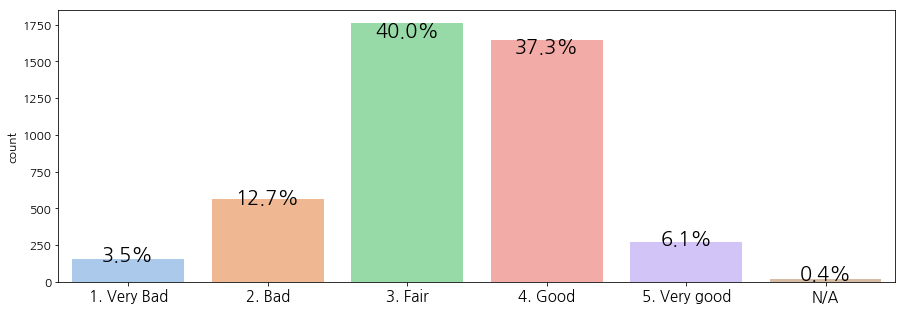

In [572]:
plt.figure(figsize=(15,5))
sns.set_palette("pastel")
df_tmp = pd.DataFrame(df_b['BC1'].fillna('N/A'))
df_sum = len(df_tmp)
ax = sns.countplot(x='BC1', data = df_tmp, order = ['1. Very Bad', '2. Bad','3. Fair', '4. Good', '5. Very good', 'N/A'])

# plt.title(df_vbi.loc['BC1']['question'], fontsize = 20)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height >0:
        ax.annotate(str("%.1f"%(height/df_sum*100))+"%", (left+width/2, height*0.95), ha='center')
    else:
        ax.annotate("0%", (left+width/2, 1), ha='center')
# ax.text(3.7, 1880, f'obs:{df_sum}')
# plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("")

In [554]:
df_tmp['D1'].unique()

array(['1. Sole proprietor', '2. Partnership', '5. Other', 'N/A',
       '4. Business (Pty limited)  (limited liability)',
       '3. Closed corporation (limited liability)'], dtype=object)

In [571]:
parameters = {'axes.labelsize': 12,
             'xtick.labelsize':15, 'ytick.labelsize':12}
plt.rcParams.update(parameters)

Text(0.5,0,'')

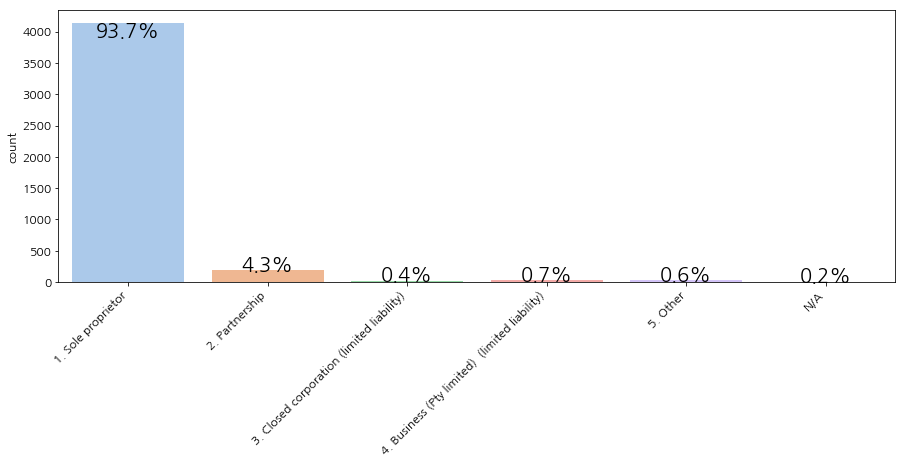

In [567]:
plt.figure(figsize=(15,5))
sns.set_palette("pastel")
df_tmp = pd.DataFrame(df_b['D1'].fillna('N/A'))
df_sum = len(df_tmp)
ax = sns.countplot(x='D1', data = df_tmp, order = ['1. Sole proprietor', '2. Partnership', '3. Closed corporation (limited liability)',  '4. Business (Pty limited)  (limited liability)',
                                                  '5. Other', 'N/A'])

# plt.title(df_vbi.loc['BC1']['question'], fontsize = 20)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height >0:
        ax.annotate(str("%.1f"%(height/df_sum*100))+"%", (left+width/2, height*0.95), ha='center')
    else:
        ax.annotate("0%", (left+width/2, 1), ha='center')
# ax.text(3.7, 1880, f'obs:{df_sum}')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("")

In [ ]:
plt.figure(figsize=(15,5))
sns.set_palette("pastel")
df_tmp = pd.DataFrame(df_b['BC1'].dropna())
df_sum = len(df_tmp)
ax = sns.countplot(x='BC1', data = df_tmp, order = ['1. Very Bad', '2. Bad','3. Fair', '4. Good', '5. Very Good'])

plt.title(df_vbi.loc['BC1']['question'], fontsize = 20)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height >0:
        ax.annotate("%.1f"%(height/df_sum*100), (left+width/2, height*0.95), ha='center')
ax.text(3.7, 1880, f'obs:{df_sum}')

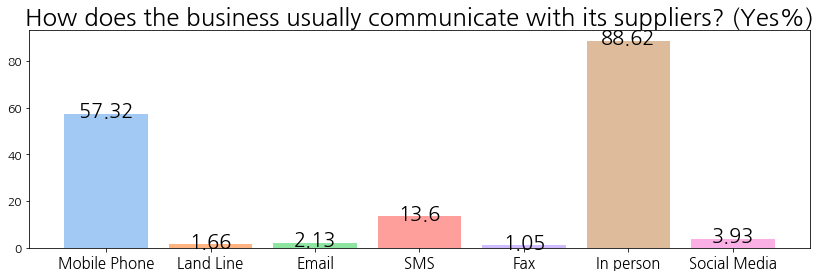

In [755]:
df_ad = df_yesno[df_yesno['question'].str.contains('communicate with its suppliers')]
plt.figure()
colors = sns.color_palette('pastel',len(df_ad))
bar = plt.bar(['Mobile Phone','Land Line','Email','SMS','Fax', 'In person', 'Social Media'],df_ad['yes%'].to_list(), color = colors)

for x in bar:
    h = x.get_height()
    plt.text(x.get_x()+x.get_width()/2,h-1.2, ha='center',s=round(h,2), size = 20)
plt.title('How does the business usually communicate with its suppliers? (Yes%)', fontsize = 24)

plt.show()


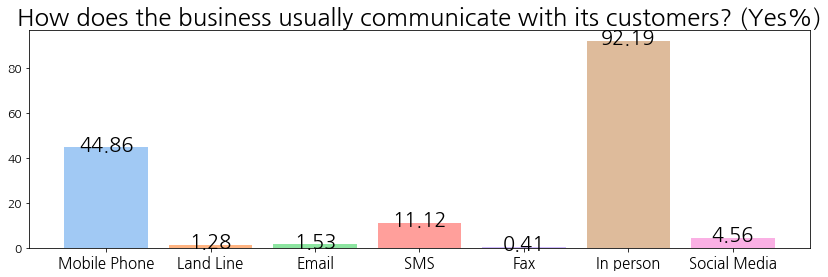

In [756]:
df_ad = df_yesno[df_yesno['question'].str.contains('communicate with its customers')]
plt.figure()
colors = sns.color_palette('pastel',len(df_ad))
bar = plt.bar(['Mobile Phone','Land Line','Email','SMS','Fax', 'In person', 'Social Media'],df_ad['yes%'].to_list(), color = colors)

for x in bar:
    h = x.get_height()
    plt.text(x.get_x()+x.get_width()/2,h-1.2, ha='center',s=round(h,2), size = 20)
plt.title('How does the business usually communicate with its customers? (Yes%)', fontsize = 24)

plt.show()


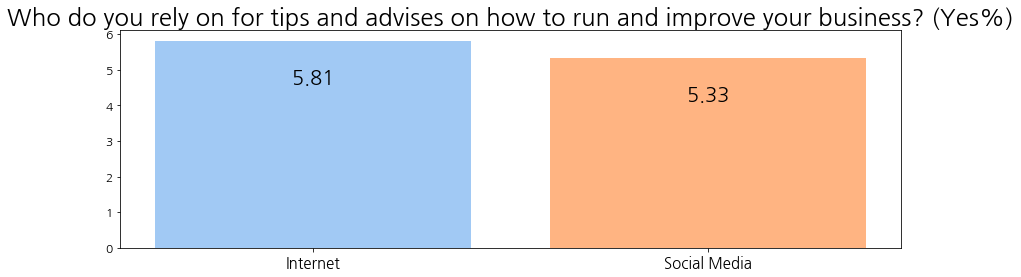

In [757]:
df_ad = df_yesno[df_yesno['question'].str.contains('tips and advises')]
plt.figure()
colors = sns.color_palette('pastel',len(df_ad))
bar = plt.bar(['Internet', 'Social Media'],df_ad['yes%'].to_list(), color = colors)

for x in bar:
    h = x.get_height()
    plt.text(x.get_x()+x.get_width()/2,h-1.2, ha='center',s=round(h,2), size = 20)
plt.title('Who do you rely on for tips and advises on how to run and improve your business? (Yes%)', fontsize = 24)

plt.show()


Text(0.5,1,'What do you use the internet for?')

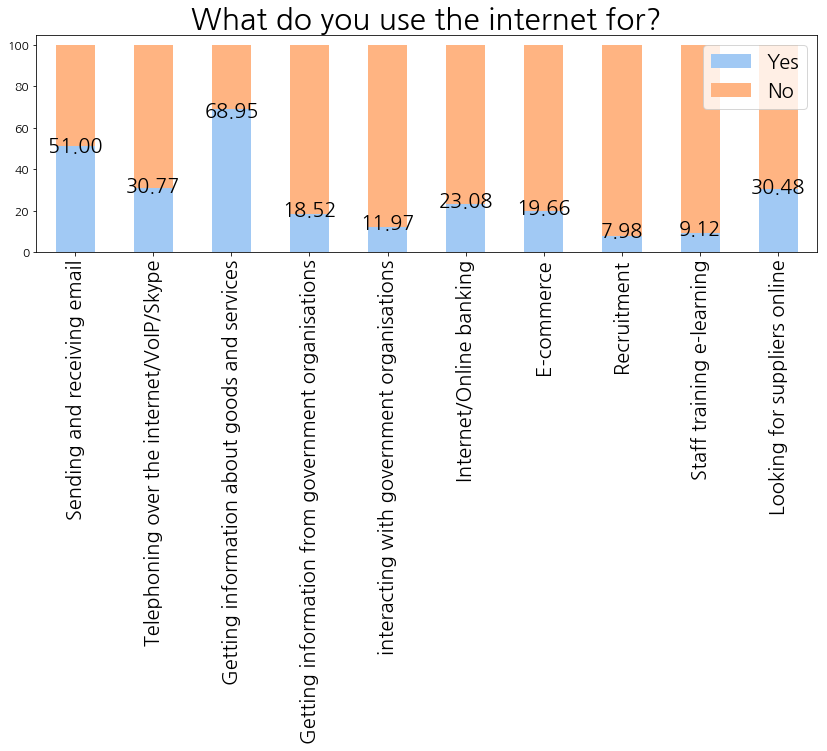

In [354]:
df_training = df_b[['I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15']].replace('0', 0, regex=True).replace('1', 1, regex=True)
df_stack = pd.DataFrame((df_training.mean()*100).T, columns = ['Yes'])
df_stack['No'] = 100 - df_stack['Yes']
df_stack.index = ['Sending and receiving email', 'Telephoning over the internet/VoIP/Skype','Getting information about goods and services','Getting information from government organisations','interacting with government organisations',
              'Internet/Online banking','E-commerce','Recruitment','Staff training e-learning','Looking for suppliers online']
ax = df_stack.plot(kind='bar', stacked=True)
for p in ax.patches[:10]:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height), (left+width/2, height*0.95), ha='center')
plt.title('What do you use the internet for?')

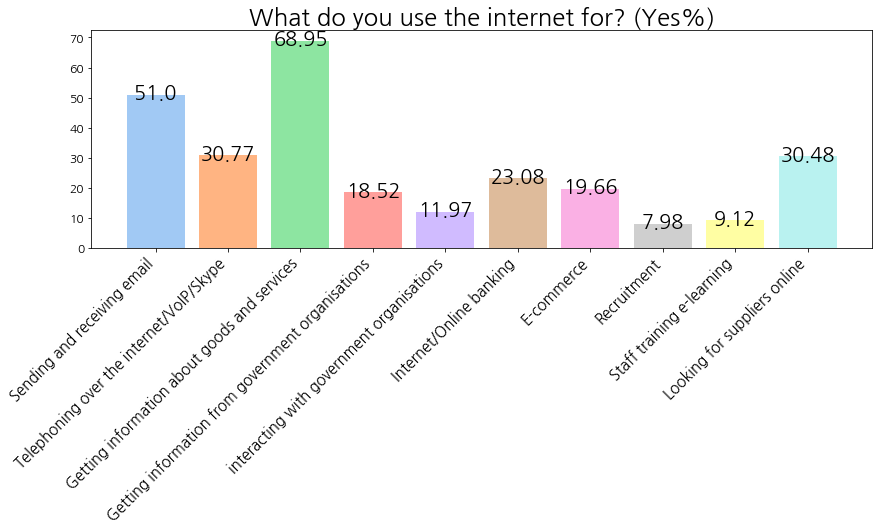

In [758]:
df_ad = df_yesno[df_yesno['question'].str.contains('you use the internet for')]
plt.figure()
ax = plt.subplot(1, 1, 1)
colors = sns.color_palette('pastel',len(df_ad))
bar = ax.bar(['Sending and receiving email', 'Telephoning over the internet/VoIP/Skype','Getting information about goods and services','Getting information from government organisations','interacting with government organisations',
              'Internet/Online banking','E-commerce','Recruitment','Staff training e-learning','Looking for suppliers online'],df_ad['yes%'].to_list(), color = colors)

for x in bar:
    h = x.get_height()
    plt.text(x.get_x()+x.get_width()/2,h-1.2, ha='center',s=round(h,2), size = 20)
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(45)
# ax.set_xticklabels(xlabels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('What do you use the internet for? (Yes%)', fontsize = 24)

plt.show()


In [355]:
df_stack

,Yes,No
Sending and receiving email,50.997151,49.002849
Telephoning over the internet/VoIP/Skype,30.769231,69.230769
Getting information about goods and services,68.945869,31.054131
Getting information from government organisations,18.518519,81.481481
interacting with government organisations,11.965812,88.034188
Internet/Online banking,23.076923,76.923077
E-commerce,19.658120,80.341880
Recruitment,7.977208,92.022792
Staff training e-learning,9.116809,90.883191
Looking for suppliers online,30.484330,69.515670


Text(0.5,1,'Does the business use mobile money for?')

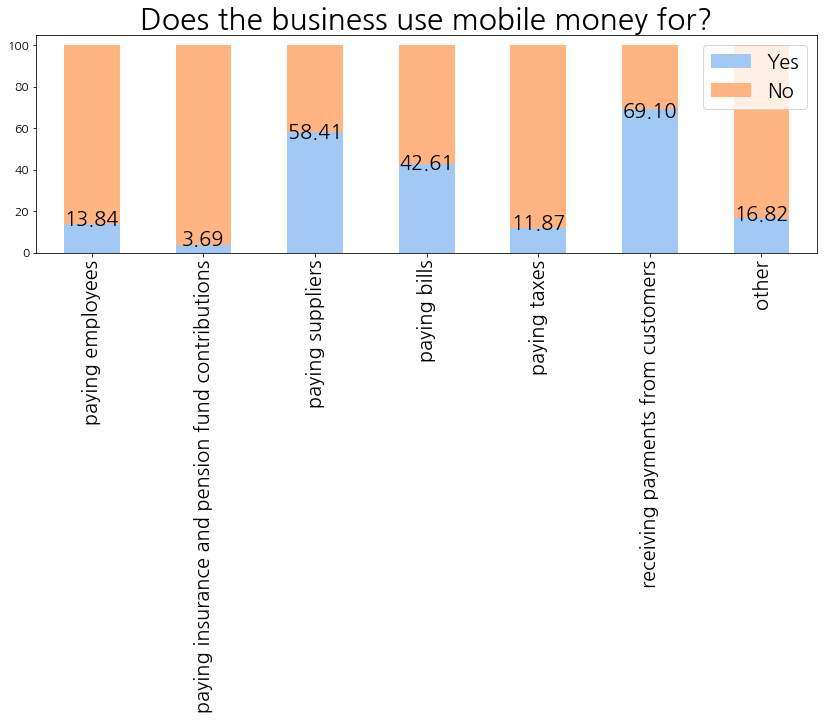

In [357]:
df_training = df_b[['MM2', 'MM3', 'MM4', 'MM5', 'MM6', 'MM7', 'MM8']].replace('0', 0, regex=True).replace('1', 1, regex=True)
df_stack = pd.DataFrame((df_training.mean()*100).T, columns = ['Yes'])
df_stack['No'] = 100 - df_stack['Yes']
df_stack.index = ['paying employees', 'paying insurance and pension fund contributions','paying suppliers','paying bills','paying taxes',
              'receiving payments from customers','other']
ax = df_stack.plot(kind='bar', stacked=True)
for p in ax.patches[:7]:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height), (left+width/2, height*0.95), ha='center')
plt.title('Does the business use mobile money for?')

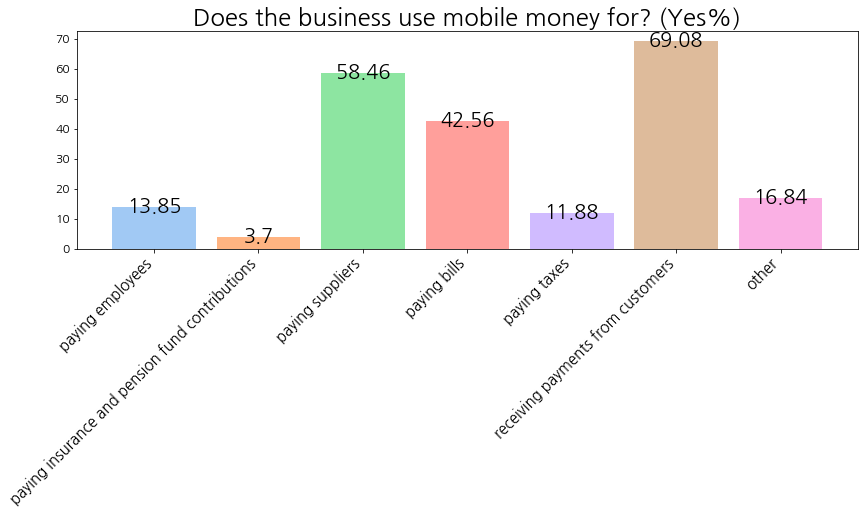

In [759]:
df_ad = df_yesno[df_yesno['question'].str.contains('Does the business use mobile money for')]
plt.figure()
ax = plt.subplot(1, 1, 1)
colors = sns.color_palette('pastel',len(df_ad))
bar = ax.bar(['paying employees', 'paying insurance and pension fund contributions','paying suppliers','paying bills','paying taxes',
              'receiving payments from customers','other'],df_ad['yes%'].to_list(), color = colors)

for x in bar:
    h = x.get_height()
    plt.text(x.get_x()+x.get_width()/2,h-1.5, ha='center',s=round(h,2), size = 20)
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(45)
# ax.set_xticklabels(xlabels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Does the business use mobile money for? (Yes%)', fontsize = 24)

plt.show()


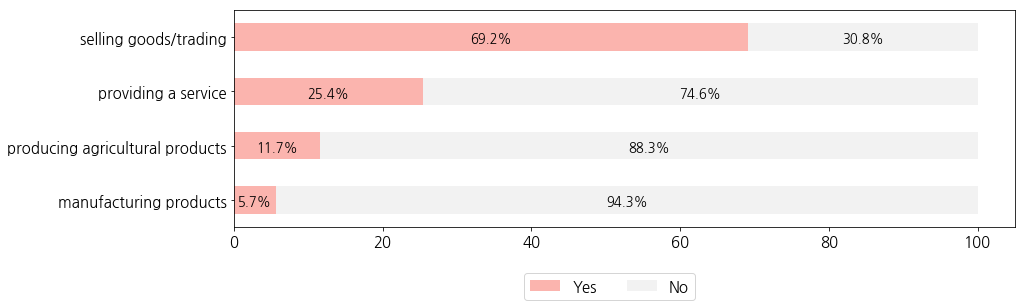

In [546]:
plot_yn(['D2a', 'D3a', 'D4a', 'D5a'], ['producing agricultural products', 'manufacturing products','selling goods/trading','providing a service'])

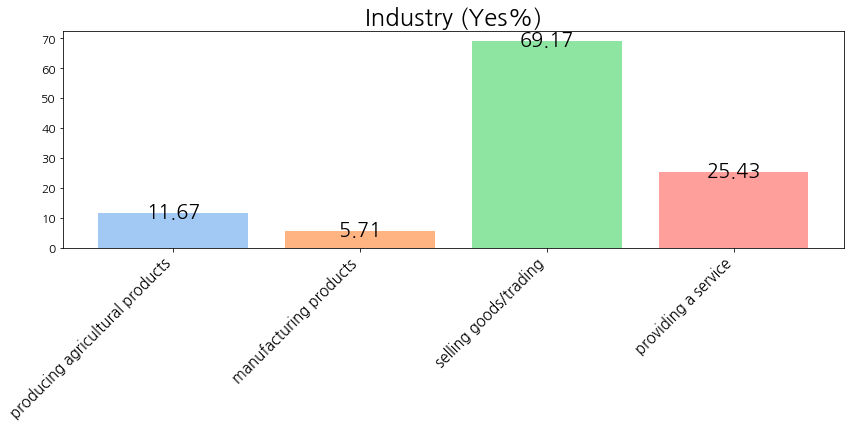

In [796]:
df_ad = df_yesno2
plt.figure()
ax = plt.subplot(1, 1, 1)
colors = sns.color_palette('pastel',len(df_ad))
bar = ax.bar(['producing agricultural products', 'manufacturing products','selling goods/trading','providing a service'],df_ad['yes%'].to_list(), color = colors)

for x in bar:
    h = x.get_height()
    plt.text(x.get_x()+x.get_width()/2,h-1.5, ha='center',s=round(h,2), size = 20)
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(45)
# ax.set_xticklabels(xlabels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Industry (Yes%)', fontsize = 24)

plt.show()


In [270]:
df_b['T6'].unique()

array(['0. No', '2. Yes customers', '3. Yes,both', '1. Yes,suppliers',
       nan, '96'], dtype=object)

In [271]:
df_b[df_b['T6']=='96']

,RIAserial,A1,A1b,A2,A3,A4b,A4s,A5,A6,education,...,F13,F14,F15,BC1,BC2,BC3,BC4,Posto,Latitude,Longitude
3202,UG001,101,,,,,,8. Uganda,NaN,1. None,...,0.0,0.0,0.0,2. Bad,3. Fair,3. Same,3. Same,,2.744113,33.181305
3203,UG002,101,,,,,,8. Uganda,NaN,1. None,...,0.0,0.0,0.0,4. Good,4. Good,3. Same,4. More,,2.744225,33.185646
3204,UG003,101,,,,,,8. Uganda,NaN,1. None,...,0.0,0.0,20000.0,4. Good,4. Good,3. Same,4. More,,2.745336,33.185383
3205,UG004,101,,,,,,8. Uganda,NaN,5. Tertiary: Bachelors,...,0.0,0.0,5000.0,3. Fair,4. Good,3. Same,3. Same,,2.738763,33.181091
3207,UG006,101,,,,,,8. Uganda,NaN,2. Primary,...,0.0,0.0,0.0,3. Fair,5. Very good,3. Same,4. More,,2.742674,33.187328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,UG691,260,,,,,,8. Uganda,NaN,1. None,...,0.0,0.0,20000.0,3. Fair,4. Good,3. Same,4. More,,-0.319681,31.762377
3893,UG692,260,,,,,,8. Uganda,NaN,1. None,...,0.0,0.0,0.0,3. Fair,4. Good,4. More,4. More,,-0.319303,31.762175
3894,UG693,260,,,,,,8. Uganda,NaN,2. Primary,...,600000.0,0.0,0.0,2. Bad,3. Fair,3. Same,5. Much more,,-0.320125,31.762091
3896,UG695,260,,,,,,8. Uganda,NaN,2. Primary,...,0.0,50000.0,5000.0,3. Fair,4. Good,1. Much less,4. More,,-0.319781,31.762325


In [251]:
df_vb = df_vb.set_index('var_name')

Text(0.5,0,'')

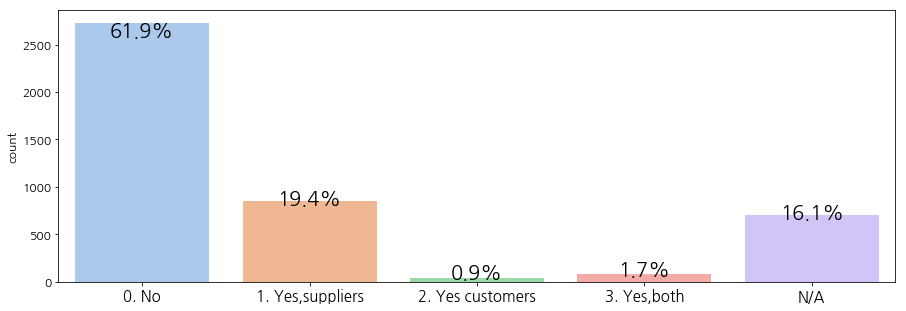

In [579]:
plt.figure(figsize=(15,5))
sns.set_palette("pastel")
df_tmp = pd.DataFrame(df_b['T5'].fillna('N/A')).replace('96', 'N/A')
df_sum = len(df_tmp)
ax = sns.countplot(x='T5', data = df_tmp, order = ['0. No', '1. Yes,suppliers','2. Yes customers', '3. Yes,both', 'N/A'])
# plt.title(df_vb.loc['T5']['question'], fontsize = 20)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height >0:
        ax.annotate(str("%.1f"%(height/df_sum*100))+"%", (left+width/2, height*0.95), ha='center')
    else:
        ax.annotate("0%", (left+width/2, 1), ha='center')
# ax.text(3.7, 1880, f'obs:{df_sum}')
# plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("")

Text(0.5,0,'')

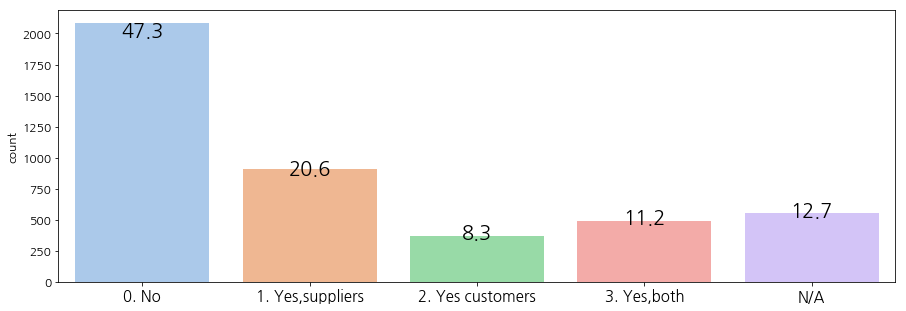

In [580]:
plt.figure(figsize=(15,5))
sns.set_palette("pastel")
df_tmp = pd.DataFrame(df_b['T6'].fillna('N/A')).replace('96', 'N/A')
df_sum = len(df_tmp)
ax = sns.countplot(x='T6', data = df_tmp, order = ['0. No', '1. Yes,suppliers','2. Yes customers', '3. Yes,both', 'N/A'])
# plt.title(df_vb.loc['T6']['question'], fontsize = 20)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height >0:
        ax.annotate("%.1f"%(height/df_sum*100), (left+width/2, height*0.95), ha='center')
# plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("")

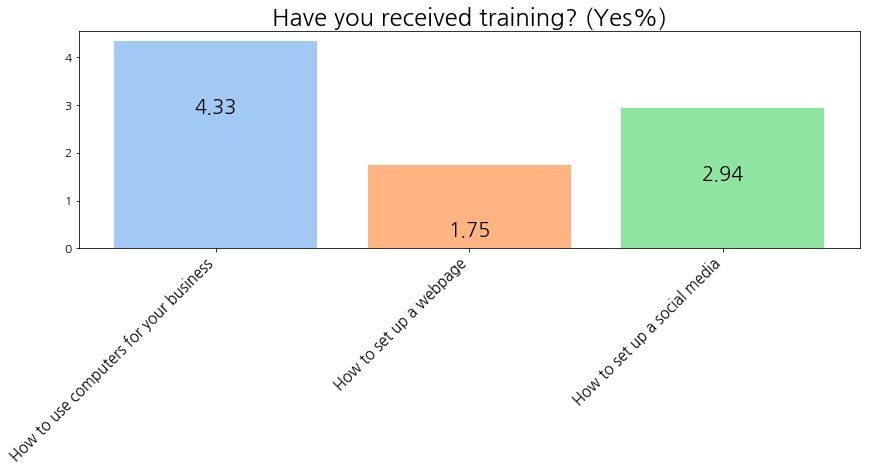

In [767]:
df_ad = df_yesno[df_yesno['question'].str.contains('Have you received training')]
plt.figure()
ax = plt.subplot(1, 1, 1)
colors = sns.color_palette('pastel',len(df_ad))
bar = ax.bar(['How to use computers for your business', 'How to set up a webpage','How to set up a social media'],df_ad['yes%'].to_list(), color = colors)

for x in bar:
    h = x.get_height()
    plt.text(x.get_x()+x.get_width()/2,h-1.5, ha='center',s=round(h,2), size = 20)
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(45)
# ax.set_xticklabels(xlabels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Have you received training? (Yes%)', fontsize = 24)

plt.show()


In [ ]:
df_ad = df_yesno[df_yesno['question'].str.contains('Have you received training')]
plt.figure()
ax = plt.subplot(1, 1, 1)
colors = sns.color_palette('pastel',len(df_ad))
bar = ax.bar(['How to use computers for your business', 'How to set up a webpage','How to set up a social media'],df_ad['yes%'].to_list(), color = colors)

for x in bar:
    h = x.get_height()
    plt.text(x.get_x()+x.get_width()/2,h-1.5, ha='center',s=round(h,2), size = 20)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Have you received training? (Yes%)', fontsize = 24)

plt.show()


In [ ]:
df_p = df_p.div(df_p.sum(axis=0), axis =1)
T.plot(kind='bar', stacked = True, figsize = (10,5), colormap='cividis')

In [471]:
df_vb['var_name']= df_vb['var_name'].str.replace('.','')
df_b[df_vb[df_vb['answer_code']=='Yes/No']['var_name']]

,D27,D28,D29,D30,D31,D32,D33,D34,D35,S12,...,B9,B10,MM1,MM2,MM3,MM4,MM5,MM6,MM7,MM8
0,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,1. Yes,...,NaN,NaN,0. No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,1. Yes,...,NaN,NaN,1. Yes,0. No,0. No,1. Yes,1. Yes,0. No,1. Yes,0. No
2,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,1. Yes,...,NaN,NaN,1. Yes,0. No,0. No,0. No,1. Yes,0. No,1. Yes,0. No
3,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,1. Yes,...,NaN,NaN,1. Yes,0. No,0. No,1. Yes,1. Yes,0. No,0. No,0. No
4,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,1. Yes,...,NaN,NaN,1. Yes,0. No,0. No,1. Yes,0. No,0. No,0. No,0. No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,0. No,1. Yes,0. No,0. No,0. No,0. No,1. Yes,0. No,0. No,1. Yes,...,NaN,NaN,1. Yes,0. No,0. No,0. No,0. No,0. No,1. Yes,0. No
4416,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,0. No,...,NaN,NaN,0. No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4417,0. No,0. No,0. No,0. No,0. No,1. Yes,0. No,0. No,0. No,1. Yes,...,NaN,NaN,1. Yes,0. No,0. No,0. No,0. No,0. No,0. No,1. Yes


In [339]:
df_vb = df_vb.set_index('var_name')

In [340]:
#yes no function
def plot_yn(var_num):
    df_yn = pd.DataFrame(df_b[var_num].dropna())
    df_yn = df_yn[df_yn[var_num]!='99']
    yn_sum = len(df_yn)
    df_yn = df_yn.replace(0, 'No', regex = True)
    df_yn = df_yn.replace(1, 'Yes', regex = True)
#     df_yn[var_num]=df_yn[var_num].str.replace(' ','')
#     df_yn[var_num]=df_yn[var_num].str.replace('0.No','No')
#     df_yn[var_num]=df_yn[var_num].str.replace('0. No','No')
#     df_yn[var_num]=df_yn[var_num].str.replace('1.Yes','Yes')
#     df_yn[var_num]=df_yn[var_num].str.replace('1. Yes','Yes')
    df_yn = pd.DataFrame(df_yn[var_num].value_counts()).sort_index(ascending=False)
    df_yn = df_yn.div(df_yn.sum(axis=0), axis=1)
    ax = df_yn.T.plot(kind='bar', stacked = True, figsize = (10,10), colormap='Pastel1')
    ax.text(0.3, 0.8, f'obs:{yn_sum}')
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
        
    plt.xlabel(f'{var_num}.{df_vb.loc[var_num]["question"]}', fontsize = 20)

In [334]:
df_y = pd.DataFrame(df_b['B9'].dropna().value_counts())
# df_y.div(df_y.sum(axis=0), axis=1).T
df_y.sort_index(ascending=False)

,B9
1.0,118
0.0,1852


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0.5,1,'Does the business send or receive mobile money?')

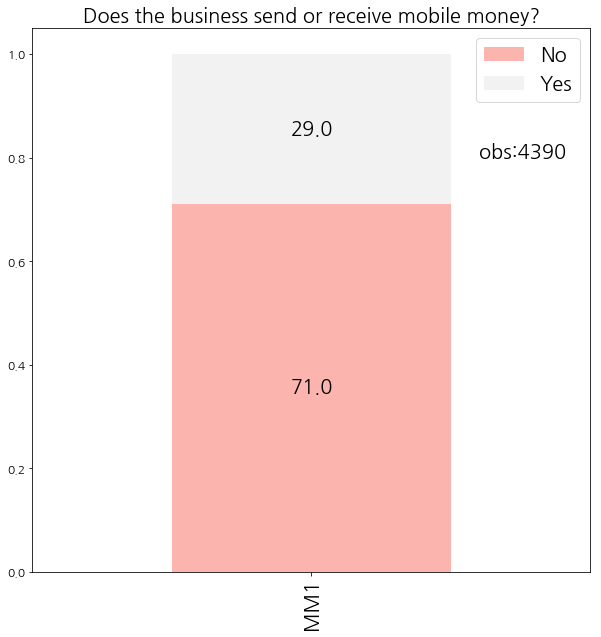

In [280]:
plot_yn('MM1')
plt.title('Does the business send or receive mobile money?', fontsize = 20)

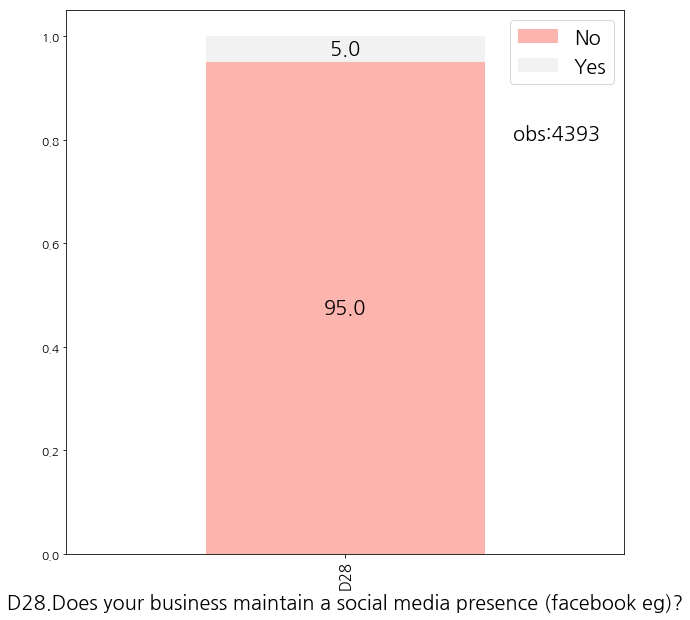

In [769]:
plot_yn('D28')

In [682]:
df_vb = df_vb.reset_index()

In [686]:
df_vb['var_name'] = df_vb['var_name'].str.replace('BS9','B9')
df_vb['var_name'] = df_vb['var_name'].str.replace('BS10','B10')
df_vb = df_vb.set_index('var_name')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


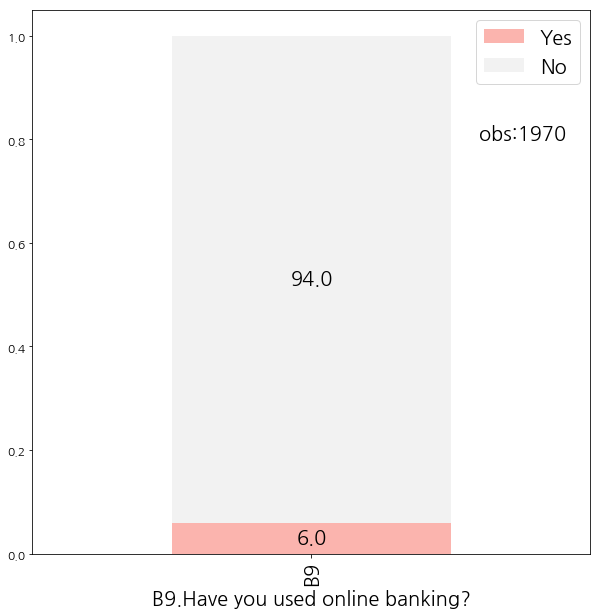

In [342]:
plot_yn('B9')

In [266]:
df_tmp = pd.DataFrame(df_b['C12'].dropna().astype('int')).astype('str')

In [267]:
df_tmp['C12']=df_tmp['C12'].str.replace('0|No','0. No')
df_tmp['C12']=df_tmp['C12'].str.replace('1', '1. Yes')

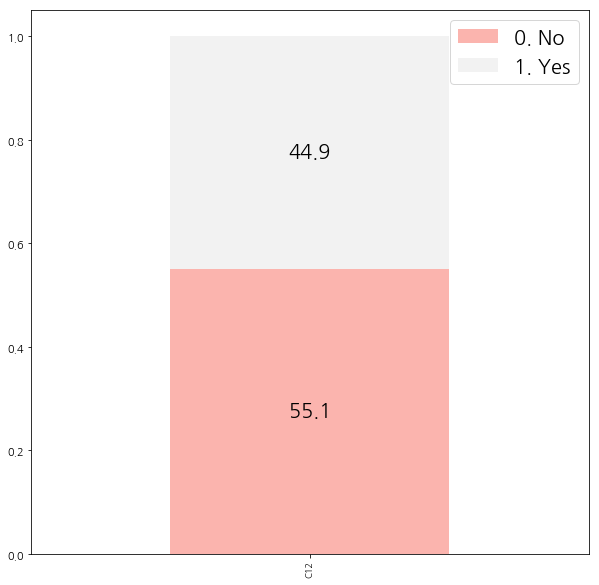

In [268]:
df_tmp = pd.DataFrame(df_tmp['C12'].value_counts())
df_tmp = df_tmp.div(df_tmp.sum(axis=0), axis =1)
ax = df_tmp.T.plot(kind='bar', stacked = True, figsize = (10,10), colormap='Pastel1')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

In [121]:
df_b['D12'].dropna().astype('int').mean()

1.1390532544378698